
# Using APIs

In [1]:
# Please inlcude your names below
# Also, please edit the name of the file and include the names of the two(or three) people answering

# Pair answering the assignment: Daniel Reiss, David Stalder
# Pair giving feedback: Ivan Allickx, Christian Aeberhard

In [2]:
import requests
import json
import os
import time
from pprint import pprint

## 1. Google books
### Setting the request URL parameters
You can set the parameters of the API request according to the documentation below. The first part of the request is always the same, and the "q" which stands for question will take various parameters. <br>
More documentation can be found at: https://developers.google.com/books/docs/v1/using?hl=vi#ids

<img src="parameters.png" width=80%> </img>

**Example**: `https://www.googleapis.com/books/v1/volumes?q=isbn:9780141909882` returns information about the book with the given ISBN number (Everything is illuminated by Jonathan Safran Foer).

**Exercise**

1. Using the above parameters create the following request URLs!
    1. Requesting books that have "potter" in the title
    2. Requesting books that have "doyle" as author
    3. With isbn "1904633684"
    4. With id "2bGdK8CRKoEC"
    5. Second result page when searching books that has "detective" listed in the category list
    6. Second result page when searching books that have "potter in the title but showing 40 results in one page, not 10. 
<br>

Try and see whether they work with `requests.get()`!

In [3]:
result_A = 'https://www.googleapis.com/books/v1/volumes?q=intitle:potter'
result_B = 'https://www.googleapis.com/books/v1/volumes?q=inauthor:doyle'
result_C = 'https://www.googleapis.com/books/v1/volumes?q=isbn:1904633684'
result_D = 'https://www.googleapis.com/books/v1/volumes?q=id:2bGdK8CRKoEC'
result_E = 'https://www.googleapis.com/books/v1/volumes?q=subject:detective&startIndex=10&maxResults=10'
result_F = 'https://www.googleapis.com/books/v1/volumes?q=intitle:potter&startIndex=10&maxResults=40'

#check with requests
requests.get(result_A).text

#continue to check all your URLs this way!
requests.get(result_B).text
requests.get(result_C).text
requests.get(result_D).text
requests.get(result_E).text
requests.get(result_F).text

'{\n "kind": "books#volumes",\n "totalItems": 486,\n "items": [\n  {\n   "kind": "books#volume",\n   "id": "bHp5CK4DLmIC",\n   "etag": "PaQTbKo2FhI",\n   "selfLink": "https://www.googleapis.com/books/v1/volumes/bHp5CK4DLmIC",\n   "volumeInfo": {\n    "title": "Harry Potter und die Kammer des Schreckens",\n    "authors": [\n     "J.K. Rowling"\n    ],\n    "publisher": "Pottermore Publishing",\n    "publishedDate": "2015-12-08",\n    "description": "Endlich wieder Schule!!! Einen solchen Seufzer kann nur der ausstoßen, dessen Ferien scheußlich und die Erinnerung an das vergangene Schuljahr wunderbar waren: Harry Potter. Doch wie im Vorjahr stehen nicht nur Zaubertrankunterricht und Verwandlung auf dem Programm. Ein grauenhaftes Etwas treibt sein Unwesen in den Gemäuern der Schule - ein Ungeheuer, für das nicht einmal die mächtigsten Zauberer eine Erklärung finden. Wird Harry mit Hilfe seiner Freunde Ron und Hermine das Rätsel lösen und Hogwarts von den dunklen Mächten befreien können?",

1G. Define a function that sends a request to the google books API with the URL parameters as inputs to the function. Try to incorporate as many as the variables as possible and output a URL according to the settings you want to have. Don't forget to write a docstring explaning how the function works. Docstrings are explanations to functions, describing the input, output, and purpose of the function. If you haven't used them before, you can find more examples for example at: https://www.geeksforgeeks.org/python-docstrings/

In [4]:
#input example: title = intitle:potter
def request_books_api(**kwargs):
    """It's posslible to input every argument from the api you want. 
    Input example: 'intitle:potter', author='inauthor:grabe', startIndex='startIndex=10'
    Use the parameter according to the Google Books API
    https://developers.google.com/books/docs/v1/using?hl=vi#ids"""
    
    url = 'https://www.googleapis.com/books/v1/volumes?q='
    for key, value in kwargs.items():
        url = url + value + '&'
    return url[0:-1]

#example
print(request_books_api(title='intitle:potter', author='inauthor:grabe', startIndex='startIndex=10'))

https://www.googleapis.com/books/v1/volumes?q=intitle:potter&inauthor:grabe&startIndex=10


#### Status codes

Responses contain information even without looking into the textual content. printing the response tells us the URL we requested, the date, its status, the content type and the size of the response object

The most important for us is the status: it tells us whether our request has been successful: You can find a list of HTTP status codes here https://en.wikipedia.org/wiki/List_of_HTTP_status_codes.
Or, you can always check HTTP Status Cats: https://www.flickr.com/photos/girliemac/sets/72157628409467125

The most important status codes for us are:

- successful call: code 200
- client error: 4xx, e.g. 401: Unauthorized, 404: Not found
- server error: 5xx, e.g. 500: Internal Server Error, 502: Bad Gateway

### 2. Parsing json

1. Using the previously defined function, query the book with isbn number 1904633684 and print the text of the result. 

In [5]:
url1 = request_books_api(isbn='isbn:1904633684')
print(requests.get(url1).text)

{
 "kind": "books#volumes",
 "totalItems": 1,
 "items": [
  {
   "kind": "books#volume",
   "id": "tBasGxqDMbMC",
   "etag": "1GU8jEcB/WU",
   "selfLink": "https://www.googleapis.com/books/v1/volumes/tBasGxqDMbMC",
   "volumeInfo": {
    "title": "The Case-book of Sherlock Holmes",
    "authors": [
     "Arthur Conan Doyle"
    ],
    "publisher": "Collector's Library",
    "publishedDate": "2004",
    "description": "The Casebook of Sherlock Holmes contains Conan Doyle's last twelve stories about his great fictional detective. Compared with earlier collections these tales are darker, exploring such themes as treachery, mutilation and the terrible consequences of infidelity, and containing such gothic touches as a blood-sucking vampire and crypts at midnight. With an Afterword by David Stuart Davies, a Fellow of the Royal Literary Fund, and an authority on Sherlock Holmes. He has written the Afterwords for all the Collector's Library Holmes volumes.",
    "industryIdentifiers": [
     

2. Now load the previous response into a json object.:

In [6]:
requests.get(url1).json

<bound method Response.json of <Response [200]>>

3. What are the highest level keys of the json object?

In [7]:
js = requests.get(url1).text
json_dict = json.loads(js)
print('The highest level keys of the json object are: \n')
print(json_dict.keys())

# "kind":
# "totalItems":
# "items":

The highest level keys of the json object are: 

dict_keys(['kind', 'totalItems', 'items'])


4. What is the type of the value of 'items' key?

In [8]:
type(json_dict['items'])
# list

list

5. Parse the following information from the json object

In [9]:
### Total number of items returned by the request
print(len(json_dict['items']))

### Title of the book
print(json_dict['items'][0]['volumeInfo']['title'])

### Authors of the book
print(json_dict['items'][0]['volumeInfo']['authors'][0])

### Date of publishing
print(json_dict['items'][0]['volumeInfo']['publishedDate'])

### Page Count
print(json_dict['items'][0]['volumeInfo']['pageCount'])

### Categories
print(json_dict['items'][0]['volumeInfo']['categories'][0])

### Average Rating
print(json_dict['items'][0]['volumeInfo']['averageRating'])

### Rating Count
print(json_dict['items'][0]['volumeInfo']['ratingsCount'])

### Is it avaliable as Epublication (Epub)
print('Is it available: ' + str(json_dict['items'][0]['accessInfo']['epub']['isAvailable']))


1
The Case-book of Sherlock Holmes
Arthur Conan Doyle
2004
304
Detective and mystery stories
3.5
23
Is it available: False


Unlike in the case of requesting books by IDs, the requests in which you search for author or title usually have more than one book as a result. Try searching for books that contain a specific word in their title.

6. Once you obtain the result of the request as a json object, loop through all books in the json and print out the **title** of all the books. 

In [10]:
# this one takes a while :)
url2 = request_books_api(title='intitle:potter', maxResults = 'maxResults=40')
js2 = requests.get(url2).text
json_dict2 = json.loads(js2)
totalItems = json_dict2['totalItems']
totalIterations = int(totalItems/10)+1
title_list = []

for iteration in range(0,totalIterations):
    try:
        urlIter = request_books_api(title='intitle:potter', startIndex = 'startIndex='+str(40*iteration))
        jsIter = requests.get(urlIter).text
        json_dictIter = json.loads(jsIter)
        for item in json_dictIter['items']:
            title = item['volumeInfo']['title']
            title_list.append(title)
    except:
        pass
print(title_list)


['Harry Potter - ein Literatur- und Medienereignis im Blickpunkt interdisziplinärer Forschung', 'Die Philosophie bei Harry Potter', 'Faszination "Harry Potter": Was steckt dahinter?', 'Harry Potter entzaubert - eine Analyse', 'Kulturphänomen Harry Potter', 'Märchen-Motive in "Harry Potter"', 'Didaktische Analyse eines Jugendbuchklassikers "Harry Potter und der Stein der Weisen". Untersuchung auf die Eignung für den Literaturunterricht in der Schule', 'Harry Potter - geretteter Retter im Kampf gegen dunkle Mächte?', 'Zu: J.K. Rowling, HARRY POTTER', 'Die emotionale Wirkung und Wahrnehmung von Filmmusik in Harry Potter', 'Harry Potter und der Feuerkelch (Harry Potter 4)', "Der Zusammenhang von Tod und Liebe anhand des Charakters des Lord Voldemort in der 'Harry Potter'-Heptalogie", 'J. K. Rowling’s Severus Snape in the "Harry Potter" Series. Anti-Hero or Tragic Hero in Literature?', "J.K. Rowlings 'Harry Potter' - Mythen in der Namensgebung", 'Harry Potter und der Gefangene von Askaban',

7. Now search for books with a category and print out the authors

In [11]:
# this one takes a while, too :)
url3 = request_books_api(category='subject:football', maxResults = 'maxResults=40')
js3 = requests.get(url3).text
json_dict3 = json.loads(js3)
totalItems = json_dict3['totalItems']
totalIterations = int(totalItems/10)+1
author_list = []

for iteration in range(0,totalIterations):
    try:
        urlIter = request_books_api(title='subject:football', startIndex = 'startIndex='+str(40*iteration))
        jsIter = requests.get(urlIter).text
        json_dictIter = json.loads(jsIter)
        for item in json_dictIter['items']:
            authors = item['volumeInfo']['authors']
            for author in authors:
                author_list.append(author)
    except:
        pass
print(author_list)

['Rich Eisen', 'Jackson Michael', 'Sal Maiorana', 'Julie Des Jardins', 'Daniel R. Gilbert', 'Michael Felger', 'Todd Gerelds', 'Mark Schlabach', 'Bobby Bowden', 'Russ Crawford', 'Jens Bangsbo', 'Thomas Reilly', 'Mike Hughes', 'Robert W. Turner, II', 'Steve Belichick', 'Pat Flynn', 'Catherine Gilbert Murdock', 'Kurt Edward Kemper', 'Vic Hermans', 'Rainer Engler', 'American Football Coaches Association', 'Mark Oristano', 'American Football Coaches Association', 'Nate LeBoutillier', 'Jorge Santillan', 'Stephanie Watson', 'Allen Barra', 'Jason Brown', 'Landmark News Service', 'Wayne Kelliher', 'Jack Gilden', 'Bud Wilkinson', 'Robert Handville', 'Javier Lopez Lopez', 'Will Graves', 'John Ed Bradley', 'Chad Brown', 'Alan Eisenstock', 'Michael J. Arthur', 'Bryan L. Bailey', 'Ferhat Guven', 'The Lost Century of Sports Collection', 'Walter Camp', 'David Claerbaut', 'Lars Anderson', 'Bo Jackson', 'Dick Schaap', 'John William Heisman', 'Joe Nick Patoski', 'Ken Leiker', 'Craig Ellenport', 'Thomas J

8. Define a function that given an item in the json object (the meta information about one book) returns a list with the following attributes: `title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub`. 
<br>
Note that **not** every book has all the features required. If a piece of information is missing, your code should write NaN instead in place of the value. 

In [12]:
def parse_json(j):
    '''the function takes a book item as an input and returns a list of the extracted features'''
    title = authors = publishedDate = pageCount = categories = averageRating = ratingsCount = epub = 'NaN'
    try:
        title = j['volumeInfo']['title']
        authors = j['volumeInfo']['authors']
        publishedDate = j['volumeInfo']['publishedDate']
        pageCount = j['volumeInfo']['pageCount']
        categories = j['volumeInfo']['categories']
        averageRating = j['volumeInfo']['averageRating']
        ratingsCount = j['volumeInfo']['ratingsCount'] 
        epub = j['accessInfo']['epub']['isAvailable']
    except:
        pass
    return title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub

for item in json_dict3['items']:
    print(parse_json(item))


('Total Access', ['Rich Eisen'], '2007-10-30', 310, ['Humor'], 4.0, 4, False)
('The Game Before the Money', ['Jackson Michael'], '2014-09', 368, ['Sports & Recreation'], 'NaN', 'NaN', 'NaN')
('Memorable Stories of Buffalo Bills Football', ['Sal Maiorana'], '2005-01', 200, ['Sports & Recreation'], 'NaN', 'NaN', 'NaN')
('Walter Camp', ['Julie Des Jardins'], '2015-09-29', 416, ['History'], 'NaN', 'NaN', 'NaN')
('Wins, Losses, and Human Ties', ['Daniel R. Gilbert'], '2008', 205, ['Business & Economics'], 'NaN', 'NaN', 'NaN')
('Tales from the Patriots Sideline', ['Michael Felger'], '2006-09-01', 173, ['Sports & Recreation'], 'NaN', 'NaN', 'NaN')
('Woodlawn', ['Todd Gerelds', 'Mark Schlabach', 'Bobby Bowden'], '2015-09-15', 208, ['Biography & Autobiography'], 'NaN', 'NaN', 'NaN')
('Le Football', ['Russ Crawford'], '2016-08-01', 384, ['History'], 'NaN', 'NaN', 'NaN')
('Science and Football III', ['Jens Bangsbo', 'Thomas Reilly', 'Mike Hughes'], '1997', 339, ['Sports & Recreation'], 'NaN', 'Na

### 3. New York Times API

Your task in this exercise will be to compare the amount of Brexit, Trump and Corona related articles in the last 6 months, using an API that the New York Times provides. 

Start with creating an API key on the NYT API website. As you can see there are multiple functionalities/APIs that the NYT provides. For this exercise we will use the one that allows you to search among articles. so when you sign up for the API key, make sure to pick that one. 

Here's the documentation for using this API, it explains the syntacs of queries: https://developer.nytimes.com/docs/articlesearch-product/1/overview 

1. How can you specify a keyword to search for in the URL? https://api.nytimes.com/svc/search/v2/articlesearch.json?q={query}&api-key={key}
2. How can you specify a date or multiple dates to search for? https://api.nytimes.com/svc/search/v2/articlesearch.json?q={query}&begin_date=20120101&end_date=20120101&api-key={key}
3. Write a function that takes a query to the API as an input and returns the number of hits (number of article results) that this query returns. 
4. How many results are in a response json by default? How would you collect all results for a specific search? Either write an example code that in fact collects all articles for a query (in an example that has more than one page of results) or explain in detail how you would automate this process. You can use the function you created in 3. to automatically determine how may pages you have to loop through. 

Now you have all the pieces together to write a function that collects all results for a specific topic (keyword) written on a specific date. Remember, that our original question was how the appearance of 3 topics changed over time in the last 6 months. 

5. Loop through all dates in the last 6 months and figure out how many articles there were in each of the 3 topics. You can aggregate into weekly or monthly buckets. You can also include synonyms of the given words (e.g. "Covid-19" for "Corona") or also search other terms that interest you.

Using the below code, you can do a visualization of your findings. 

Trick for pretty printing json:
when dealing with large json objects and trying to understand them, it is often difficult to read them on the screen. Use pprint library to see a nicer version of these jsons. (from pprint import pprint, and pprint("hello world"))

#### Visualization

To help you out with the visualization, we have created the code below. In the description of the function you can find instructions on how to use it. There is also an example of a call underneath the function.

You need to give two parameters to the function. The first one is a dictionary where the keys are the three search query terms that you have used (given as a string); for each term there is one list with the number of queries per each time-block considered. The second parameter is a list of strings with the names of the time periods being considered. 

Important note: the lengths of the lists must match. It is assumed that for each query there is a vector having the number of hits per each period specified in the list of the second parameter. This means that the three lists in the dictionary and the list given as the second parameter must have equal lengths.

In [13]:
# This is a pre-implemented function for crating the visualisation
# You don't have to modify this

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_no_articles(dictionary_results, periods):
    '''
    Plots the statistics with the number of articles in the past month.
    
    dictionary_results = dictionary of the form query_term: [no_articles_for_period_1, no_articles_for_period_2, ...]
        e.g. {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
             if you group articles by month periods, and 
             you have looked only at the past two months, and
             there were 250 hits for Brexit in February, and 200 in March, and
             there were 100 hits for Trump in February, and 75 in March, and
             there were 300 hits for Corona in February, and 400 in March
    periods = list of time periods used for the investigation
        e.g. ['February', 'March']
             if you have considered the past two months
    '''
    d = dictionary_results
    labels = periods
    query_terms = list(d.keys())
    list_0 = d[query_terms[0]]
    list_1 = d[query_terms[1]]
    list_2 = d[query_terms[2]]
    
    # locations for labels
    x = np.arange(0, len(labels))
    # width per bar
    width = 0.3
    
    # Building the subplots
    fig, ax = plt.subplots(figsize=(18,5))
    rects1 = ax.bar(x - width, list_0, width, label=query_terms[0])
    rects2 = ax.bar(x, list_1, width, label=query_terms[1])
    rects3 = ax.bar(x + width, list_2, width, label=query_terms[2])

    # Labeling
    ax.set_xlabel('Time periods')
    ax.set_ylabel('Number of articles')
    ax.set_title('Number of articles by query')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.autoscale()
    xmin = -2*width
    xmax = max(np.arange(len(labels)))+2*width
    ymin = 0
    ymax = max(list_0+list_1+list_2)*1.1 
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.legend(loc='best')


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() /2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()

# Below there is one example of how to use the above plot function
dict_results2 = {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
plot_no_articles(dict_results2, ['February', 'March'])



<Figure size 1800x500 with 1 Axes>

#### Your solution for the third exercise

In [14]:
### Code for task 3

def nr_of_hits(query):
    my_key = 'wyXRoA9Vic8PBvDAOMgagUZhjjp6GXHT'
    url_nyt = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q={'+query+'}&api-key='+my_key
    js4 = requests.get(url_nyt).text
    json_dict4 = json.loads(js4)
    hits = json_dict4['response']['meta']['hits']
    return hits

nr_of_hits('kappeler brücke')

52

In [15]:
### Code for task 4
# by default, there are 10 results. We need to iterate over all the pages. Therefore, this one takes a while
# the documentation says that there are at most 100 pages reachable.
total_hits = nr_of_hits('kappeler brücke')
iterations = int(total_hits/10)
if iterations > 100:
    iterations = 100
list1 = []
for i in range(0, iterations):
    my_key = 'wyXRoA9Vic8PBvDAOMgagUZhjjp6GXHT'
    url_nyt = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q={kappeler brücke}&api-key='+my_key+'&page='+str(i)
    js5 = requests.get(url_nyt).text
    json_dict5 = json.loads(js5)
    list1.append(json_dict5)

pprint(list1)

[{'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights '
               'Reserved.',
  'response': {'docs': [{'_id': 'nyt://article/a80b0293-40b4-54ef-a580-f37f568a6c9e',
                         'abstract': 'MOSSACK-Robert, D.D.S. Members of the '
                                     'Medical/Dental Staff mourn the untimely '
                                     'death of Robert Mossack, D.D.S., a '
                                     'member of the Hospital Dental Staff '
                                     'since January 1986. We extend our '
                                     'heartfelt sympathy to the Mossack '
                                     'family. Deborah Tascone, R.N., M.S., '
                                     'Executive Director Alan Mensch, M.D., '
                                     'Med Director Bruce Kappel, M.D., '
                                     'President, Medical/Dental Staff Jeffrey '
                                     'Haberma

                                     'Impressionist paintings are an important '
                                     'part of the collection.   Details of the '
                                     'Connecticut Impressionist Art Trail are '
                                     'contained in a pamphlet that describes '
                                     'each museum, the artists represented '
                                     'there and something about the town, its '
                                     'restaurants, accommodations, and the '
                                     'scenes that inspired Impressionist '
                                     'paintings.   Group tour information may '
                                     'be obtained by calling 800-879-4222. For '
                                     'other information or to obtain a '
                                     'pamphlet, call the nearest Convention '
                                     'and Visitors Bureau 

                                        {'caption': None,
                                         'credit': None,
                                         'crop_name': 'miniMoth',
                                         'height': 70,
                                         'legacy': {},
                                         'rank': 0,
                                         'subType': 'miniMoth',
                                         'subtype': 'miniMoth',
                                         'type': 'image',
                                         'url': 'images/2015/07/14/nyregion/STONEWALLweb1/STONEWALLweb1-miniMoth-v2.jpg',
                                         'width': 151},
                                        {'caption': None,
                                         'credit': None,
                                         'crop_name': 'windowsTile336H',
                                         'height': 336,
                                         'legacy'

                                         'crop_name': 'videoSixteenByNine150',
                                         'height': 84,
                                         'legacy': {},
                                         'rank': 0,
                                         'subType': 'videoSixteenByNine150',
                                         'subtype': 'videoSixteenByNine150',
                                         'type': 'image',
                                         'url': 'images/2015/07/14/nyregion/STONEWALLweb1/STONEWALLweb1-videoSixteenByNine150.jpg',
                                         'width': 150},
                                        {'caption': None,
                                         'credit': None,
                                         'crop_name': 'videoSixteenByNine1050',
                                         'height': 591,
                                         'legacy': {},
                                         'rank': 0,
 

                         'news_desk': 'None',
                         'print_page': '36',
                         'pub_date': '1978-04-23T05:00:00+0000',
                         'section_name': 'Archives',
                         'snippet': 'rev of Sen vote (S)',
                         'source': 'The New York Times',
                         'type_of_material': 'Archives',
                         'uri': 'nyt://article/cf821bf3-8122-5a91-ba61-ccb0f7b50b0f',
                         'web_url': 'https://www.nytimes.com/1978/04/23/archives/obituary-2-no-title.html',
                         'word_count': 2395},
                        {'_id': 'nyt://article/18175e2d-840c-51fb-b5b5-992ccd2ef855',
                         'abstract': 'FILM.',
                         'byline': {'organization': None,
                                    'original': None,
                                    'person': []},
                         'document_type': 'article',
                         'head

                                                'organization': '',
                                                'qualifier': None,
                                                'rank': 1,
                                                'role': 'reported',
                                                'title': None}]},
                         'document_type': 'article',
                         'headline': {'content_kicker': None,
                                      'kicker': None,
                                      'main': 'OSLO: MEET ME AT THE CAFE',
                                      'name': None,
                                      'print_headline': 'OSLO: MEET ME AT THE '
                                                        'CAFE',
                                      'seo': None,
                                      'sub': None},
                         'keywords': [{'major': 'N',
                                       'name': 'subject',
                  

                                     '(845) 265-4010.    Cross River -- '
                                     "''Winds of Japan,'' works by Kiyoshi "
                                     'Otsuka and Miko Goodnough. Through Sept. '
                                     '23. Hours: Mondays through Saturdays, '
                                     '10a.m. to 5:30 p.m.; Sundays, noon to 5 '
                                     'p.m. Gallery Yellow, 792 Route 35. (914) '
                                     "763-0101.    Cross River -- ''Prints!,'' "
                                     'serigraphs by Andy Warhol, Roy '
                                     'Lichtenstein, Keith Haring and Tom '
                                     'Christopher. Friday through Dec. 31. '
                                     'Parking fee: $4 to $8. Hours: daily, 9 '
                                     'a.m. to 4 p.m. Ward Pound Ridge '
                                     'Reservation, Routes 35 and 121 South

                         'print_page': '31',
                         'pub_date': '1976-10-12T05:00:00+0000',
                         'section_name': 'Archives',
                         'snippet': '',
                         'source': 'The New York Times',
                         'type_of_material': 'Archives',
                         'uri': 'nyt://article/e12a75dc-1e1c-5f61-9d66-58d6e228ace1',
                         'web_url': 'https://www.nytimes.com/1976/10/12/archives/deaths.html',
                         'word_count': 4294},
                        {'_id': 'nyt://article/a730a87f-533a-5d08-8399-16f5ce6aceb2',
                         'abstract': 'ABRAHAMS&#8208;Adam A. beloved husband '
                                     'of the late Ida, devoted father of Bryna '
                                     'Krackow and Bernard Abrams, adored '
                                     'brother and loving grandfather. Services '
                                     'Sunday, 10 A.M.,

                                     '4:16:02  14226 Mordos, J, 41M . . . '
                                     '4:16:03  14227 Rowe, D, 57M . . . '
                                     '4:16:03  14228 Jordan, J, 50F . . . '
                                     '4:16:03  14229 Rowe, M, 31F . . . '
                                     '4:16:03  14230 Pierre, M, 53M . . . '
                                     '4:16:03  14231 Lasso, R, 30M . . . '
                                     '4:16:03  14232 Nilsen, A, 52M . . . '
                                     '4:16:04  14233 Broussard, J, 35M . . . '
                                     '4:16:04  14234 Van Der Star, P, 48M . . '
                                     '. 4:16:04  14235 Hovenier, E, 36F . . . '
                                     '4:16:04  14236 Smith, M, 50F . . . '
                                     '4:16:04  14237 Matsuyoshi, J, 52F . . . '
                                     '4:16:05  14238 Shiu, P, 49M . . . '
     

                                     '4:45:20   21222 Sullivan, T, 43M '
                                     '4:45:20    21223 Stokvis, S, 31M '
                                     '4:45:21    21224 Saldana Perez, J, 34M '
                                     '4:45:21    21225 Seid, N, 41M 4:45:21    '
                                     '21226 Falco, S, 30F 4:45:21    21227 '
                                     'Sanchez, J, 49F 4:45:22    21228 '
                                     'Dieveney, T, 26M 4:45:22    21229 '
                                     'Alarid, M, 36F 4:45:22    21230 Harju, '
                                     'S, 31F4:45:23    21231 Artaki, M, 38M '
                                     '4:45:23    21232 Zapata-Arboleda, A, 31M '
                                     '4:45:24    21233 Jensen, R, 45M '
                                     '4:45:24    21234 McCarthy, P, 26F '
                                     '4:45:24    21235 Kalmon, T, 49M '
              

                                     'Demogenes, L, 30F 4:53:36    22816 Zins, '
                                     'J, 45M 4:53:37    22817 Wilbur, R, 51M '
                                     '4:53:37    22818 Vickery, D, 37F '
                                     '4:53:38    22819 Mehran, R, 32F '
                                     '4:53:38    22820 Lee, W, 47M 4:53:38    '
                                     '22821 Mokrzycki, M, 33F 4:53:38    22822 '
                                     'Hardy, L, 33M 4:53:38    22823 Martin '
                                     'Del Campo, A, 59M 4:53:38    22824 Mele, '
                                     'A, 26M 4:53:39    22825 Guillaume, C, '
                                     '47M 4:53:39    22826 Veres, J, 46M '
                                     '4:53:39    22827 Suttie, J, 44M '
                                     '4:53:39    22828 Vitiello, A, 30F '
                                     '4:53:40    22829 Lopez Rodrigo, S, 62M

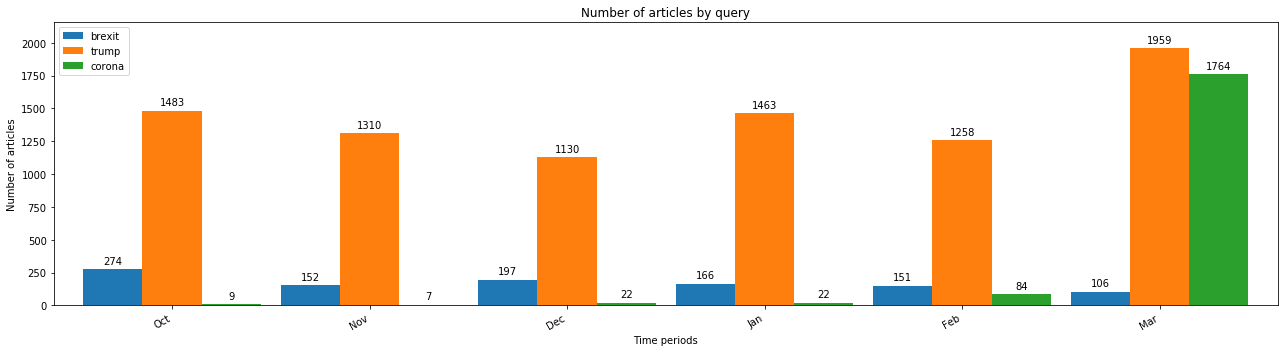

In [16]:
### Code for task 5
# because the number of get requests is so big, we included sleep timers to avoid being timeouted
# this takes about 2 minutes
time.sleep(20)
begin_date = ['20191001','20191101','20191201','20200101', '20200201', '20200301']
end_date = ['20191031','20191130', '20191231', '20200131', '20200229', '20200327']
months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
my_dict = {}
topics = ['brexit', 'trump', 'corona', 'covid-19']

def nr_of_hits_month(query, startDate, endDate):
    my_key = 'wyXRoA9Vic8PBvDAOMgagUZhjjp6GXHT'
    url_nyt = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q={'+query+'}&begin_date='+startDate+'&end_date='+endDate+'&api-key='+my_key
    js4 = requests.get(url_nyt).text
    json_dict4 = json.loads(js4)
    hits = json_dict4['response']['meta']['hits']
    return hits

for i in range(0, len(topics)):
    monthly_numbers = []
    for j in range(0,len(months)):
        temp_hits = nr_of_hits_month(topics[i],begin_date[j],end_date[j])
        time.sleep(5)
        monthly_numbers.append(temp_hits)
    # the following lines combine number of hits for 'corona' and 'covid-19'
    if topics[i] == 'covid-19':
        corona_special =[]
        for i in range(0,len(months)):
            corona_special.append(monthly_numbers[i] + my_dict[topics[2]][i])
        my_dict.update({'corona': corona_special})
    else:
        my_dict[topics[i]] = monthly_numbers


plot_no_articles(my_dict, months)


Congratulations for completing the second notebook! Now it’s time for feedback.
1.	Pass your solution to the other pair in your group.
2.	Include your feedback in the other pair’s notebook. Don’t forget to add your names at the top.
3.	Return the notebook with feedback to the original pairs.
4.	Upload your notebook, with the feedback included by the other pair on OLAT.

You can think of/suggest (among other things)
 - improvements in the code (e.g. readability, efficiency)
 - improvements in the answers (e.g. are they easy to understand, are they correct, how can they be improved?)
 - point out differences (e.g. are there any differences between the responses of the two pairs? if yes what are they, what is the cause, and in which way can they be useful?)
 
In this specific notebook the questions to focus on for feedback are: 1, 2, 4 and 5. 3 was just an intro to parsing so no need to analyze in detail. Not all suggestions about the type of feedback apply to all types of questions.

In [17]:
# Below there is space for giving feedback. This space should be used only by the other pair in your group.

'''
Ex 01:
request_books_api function: I like the approach using **kwargs, but I also see some problems with it. First off,
I think you need to define a dictionary in the link in order to get things like "inauthor", "incategory" and "intitle"
working together. With your current build, if I for example search for https://www.googleapis.com/books/v1/volumes?q=intitle:harry&inauthor:rowling
I get books with Harry in the title, but not Rowling as an Author. I was only able to fix this problem using 
a Dictionary (for your example it would be https://www.googleapis.com/books/v1/volumes?q={intitle:harry,inauthor:rowling}
be aware that inside the dict you do not separate arguments with an & but with a ,
Your problem also becomes evident if you search for an isbn among other parameters, such as:
https://www.googleapis.com/books/v1/volumes?q=intitle:harry&inauthor:rowling&isbn:9780141909882 --> will return 499
results, where it should only return 1 result (or 0). Have a look at our code, which is not as clean as yours and has
 a lot of further design potential but should work with the here mentioned problems.
 
 Ex02: (Good = My groupd had the same approach, not necessarily correct)
 1. Good
 2. Nicely displayed using Code
 3. Good
 4. Good
 5. a: This question is ambiguous, I totaly agree with your approach, whereas we counted the number of items inside
 the items dict because otherwise the length would obviously be 1, which I am not sure is what was asked for in the
 question (might very well be...)
 b. good
 c. print(json_dict['items'][0]['volumeInfo']['authors'][0]) I would leave the [0] in ['authors'][0] away, because
 in the case where there is more than just 1 author the other authors would not be displayed
 d. good
 e. good
 f. same as in c (you ignore categories expanding the category at position 0)
 g. good
 h. good
 6. I am not sure if it is necessary to include a try operator in this fun, as I can't see a situation where
 a book does not have any "title" information associated with it, but I might be wrong. I realized that in my approach,
 I only cycled through the first 40 books. I like the way you handeled this in your code with the 40*iteration
 approach
 7. good
 8. good
 
 Ex03: Overall very good
     3. Good
     4. Your code is not working properly you have to add an timeout(sleep) between each iteration else you don't get all pages 
     because of the time restriction of the times api --> like you implemented in 5.
     5. Good --> Could it be that some corona article are the same as the covid-19 articles how would you handle this?
'''

'\nEx 01:\nrequest_books_api function: I like the approach using **kwargs, but I also see some problems with it. First off,\nI think you need to define a dictionary in the link in order to get things like "inauthor", "incategory" and "intitle"\nworking together. With your current build, if I for example search for https://www.googleapis.com/books/v1/volumes?q=intitle:harry&inauthor:rowling\nI get books with Harry in the title, but not Rowling as an Author. I was only able to fix this problem using \na Dictionary (for your example it would be https://www.googleapis.com/books/v1/volumes?q={intitle:harry,inauthor:rowling}\nbe aware that inside the dict you do not separate arguments with an & but with a ,\nYour problem also becomes evident if you search for an isbn among other parameters, such as:\nhttps://www.googleapis.com/books/v1/volumes?q=intitle:harry&inauthor:rowling&isbn:9780141909882 --> will return 499\nresults, where it should only return 1 result (or 0). Have a look at our code